<a href="https://colab.research.google.com/github/akhil125554/cats-dogs-classification/blob/main/cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 38.8MB/s]
100% 1.06G/1.06G [00:31<00:00, 36.8MB/s]


In [20]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [22]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [23]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [24]:
#create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
625/625 [==============================] - 69s 89ms/step - loss: 0.6522 - accuracy: 0.6206 - val_loss: 0.6031 - val_accuracy: 0.6822
Epoch 2/10
625/625 [==============================] - 87s 139ms/step - loss: 0.5300 - accuracy: 0.7334 - val_loss: 0.5366 - val_accuracy: 0.7272
Epoch 3/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3932 - accuracy: 0.8152 - val_loss: 0.5321 - val_accuracy: 0.7626
Epoch 4/10
625/625 [==============================] - 59s 93ms/step - loss: 0.2364 - accuracy: 0.9000 - val_loss: 0.7597 - val_accuracy: 0.7608
Epoch 5/10
625/625 [==============================] - 60s 94ms/step - loss: 0.1256 - accuracy: 0.9531 - val_loss: 0.9181 - val_accuracy: 0.7460
Epoch 6/10
625/625 [==============================] - 62s 98ms/step - loss: 0.0836 - accuracy: 0.9704 - val_loss: 1.1845 - val_accuracy: 0.7496
Epoch 7/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 1.2221 - val_accurac

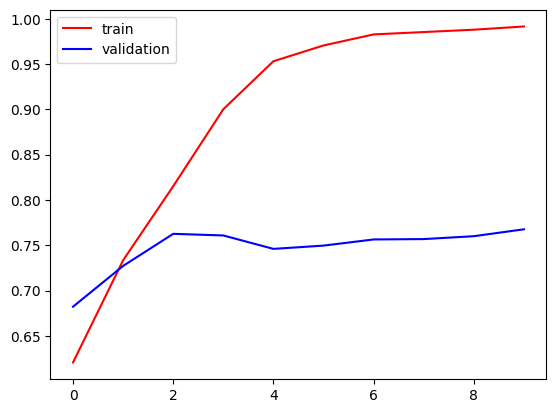

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

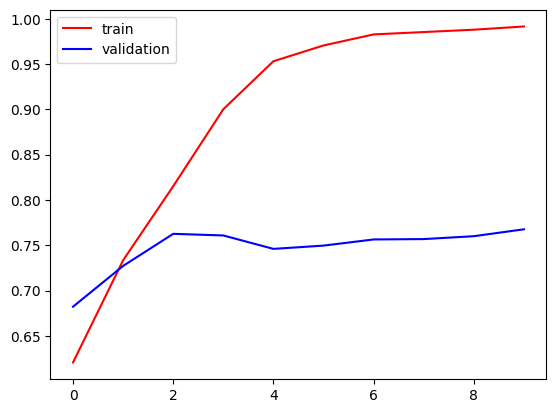

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

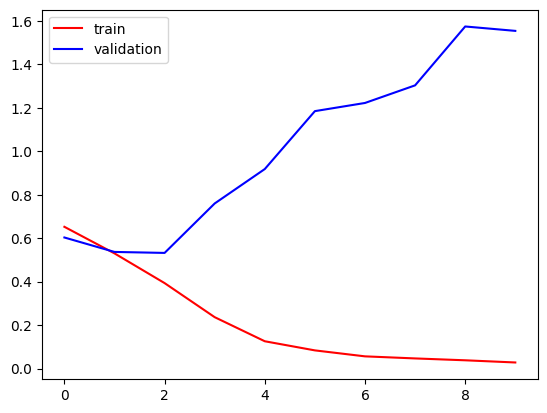

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

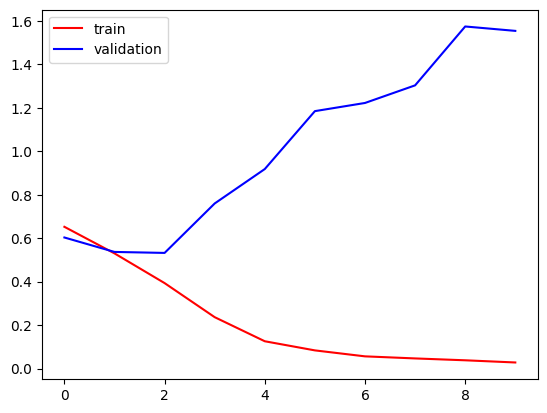

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [75]:
import cv2

In [76]:
test_img=cv2.imread('/content/cat.jpg')

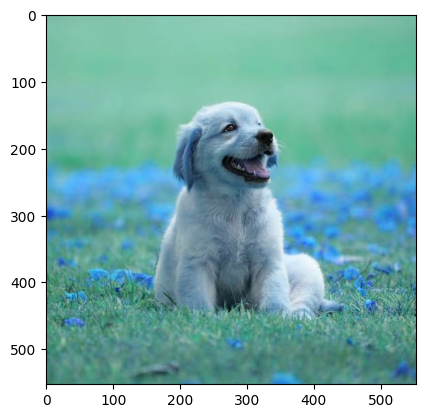

In [77]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [78]:
test_img.shape

(553, 554, 3)

In [79]:
test_img=cv2.resize(test_img,(256,256))

In [85]:
test_img.shape

(256, 256, 3)

In [86]:
test_input=test_img.reshape((1,256,256,3))

In [87]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [95]:
test_img2=cv2.imread('/content/cattt.jpg')


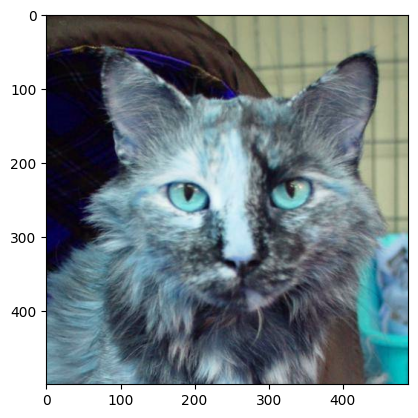

In [96]:
import matplotlib.pyplot as plt
plt.imshow(test_img2)

In [97]:
test_img2.shape

(499, 489, 3)

In [101]:
test_img2=cv2.resize(test_img2,(256,256))

In [103]:
test_input2=test_img2.reshape((1,256,256,3))

In [104]:
model.predict(test_input2)

1/1 [==============================] - 0s 42ms/step


array([[0.]], dtype=float32)